In [ ]:
import sys
import os
import matplotlib.pyplot as plt 
from tensorflow import keras

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.env.env import CustomBlackjackEnv

c:\Users\rzvn1\scoop\persist\miniconda3\envs\neurojack\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import logging
# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

In [ ]:
from src.utils.helpers import set_global_seeds, smooth

RANDOM_SEED = 18 # Or 18, or any other integer
set_global_seeds(RANDOM_SEED)

Global seeds set to 18


In [ ]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv()

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

Observation space: (player_current_sum, dealer_card_showing, usable_ace)
Action space: 0: Stand, 1: Hit
Derived state size: 3, number of actions: 2


In [ ]:
# Define basic training parameters for the .fit method
training_params = {
    "num_episodes": 10000, # Number of games the model is trained for 
    "batch_size": 128, # Number of games in a mini-batch
    "log_interval": 1000 # How often the model evaluates it's performance
}

In [ ]:
print("--- Training DQN Agent ---")

# Initialize with environment parameters
dqn_agent = DQNAgent(env)

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass basic params using **kwargs

Starting DQN training for 10000 episodes...


--- Training DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:06<00:00, 155.15 episode/s, AvgR=-0.17, Eps=0.010, Buf=1194, Steps/Int=1194]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.1705
Batch 2/10: 100%|██████████| 1000/1000 [00:06<00:00, 146.34 episode/s, AvgR=-0.07, Eps=0.010, Buf=2516, Steps/Int=1322]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.0660
Batch 3/10: 100%|██████████| 1000/1000 [00:07<00:00, 123.31 episode/s, AvgR=-0.04, Eps=0.010, Buf=3987, Steps/Int=1471]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.0360
Batch 4/10: 100%|██████████| 1000/1000 [00:07<00:00, 144.16 episode/s, AvgR=-0.02, Eps=0.010, Buf=5465, Steps/Int=1478]
Episode Batch 4000/10000, Avg Reward (last 1000): -0.0180
Batch 5/10: 100%|██████████| 1000/1000 [00:07<00:00, 136.64 episode/s, AvgR=-0.02, Eps=0.010, Buf=6992, Steps/Int=1527]
Episode Batch 5000/10000, Avg Reward (last 1000): -0.0215
Batch 6/10: 100%|██████████| 1000/1000 [00:07<00:00, 130.37 episode/s, AvgR=-0.03, Eps=0.010, Buf=8521, Steps/

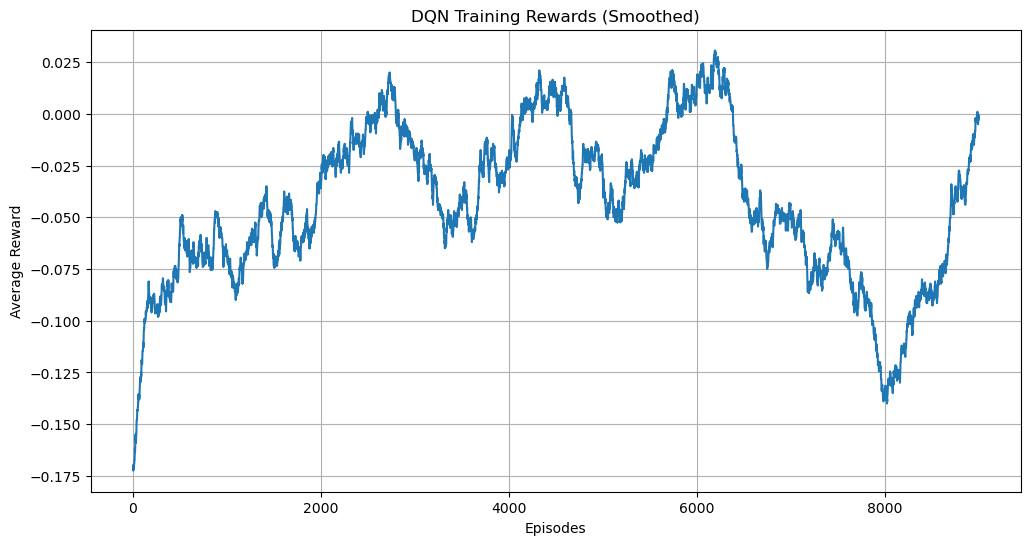

In [ ]:
# Plotting the smoothed rewards
plt.figure(figsize=(12, 6))
plt.plot(smooth(dqn_rewards_history, w=1000)) # Use a smoothing window, e.g., 1000 episodes
plt.title("DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Evaluating DQN Agent ---")
eval_dqn_agent = DQNAgent(env)
eval_dqn_agent.load_weights('models/dqn_blackjack.weights.h5')
dqn_eval = eval_dqn_agent.evaluate(env, num_eval_episodes=10000)

DQN model weights loaded from models/dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...



--- Evaluating DQN Agent ---


DQN Evaluation: 100%|██████████| 10000/10000 [00:52<00:00, 190.42episode/s, AvgR=-0.01]

--- Evaluation Results ---
Total Episodes: 10000
Average Reward: -0.0086
--------------------------


In [ ]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

# Save the trained model weights
double_dqn_agent.save_weights('models/double_dqn_blackjack.weights.h5')

Double DQN initialized.
Starting Double DQN training for 10000 episodes...



--- Training Double DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:06<00:00, 160.26 episode/s, AvgR=-0.17, Eps=0.010, Buf=1126, Steps/Int=1126]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.1690
Batch 2/10: 100%|██████████| 1000/1000 [00:06<00:00, 161.71 episode/s, AvgR=-0.11, Eps=0.010, Buf=2393, Steps/Int=1267]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.1120
Batch 3/10: 100%|██████████| 1000/1000 [00:07<00:00, 131.11 episode/s, AvgR=-0.03, Eps=0.010, Buf=3865, Steps/Int=1472]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.0250
Batch 4/10: 100%|██████████| 1000/1000 [00:07<00:00, 121.21 episode/s, AvgR=-0.04, Eps=0.010, Buf=5426, Steps/Int=1561]
Episode Batch 4000/10000, Avg Reward (last 1000): -0.0420
Batch 5/10: 100%|██████████| 1000/1000 [00:07<00:00, 134.00 episode/s, AvgR=-0.08, Eps=0.010, Buf=6956, Steps/Int=1530]
Episode Batch 5000/10000, Avg Reward (last 1000): -0.0835
Batch 6/10: 100%|██████████| 1000/1000 [00:07<00:00, 122.60 episode/s, AvgR=-0.08, Eps=0.010, Buf=8484, Steps/

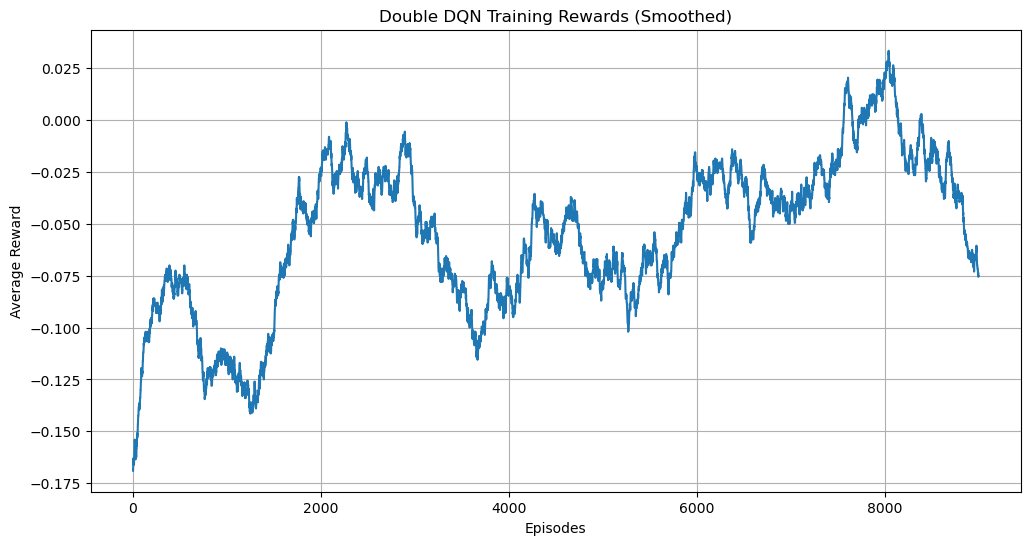

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(smooth(double_dqn_rewards_history, w=1000))
plt.title("Double DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Evaluating Double DQN Agent ---")
eval_double_dqn_agent = DoubleDQNAgent(env)
eval_double_dqn_agent.load_weights('models/double_dqn_blackjack.weights.h5')
ddqn_eval = eval_double_dqn_agent.evaluate(env, num_eval_episodes=10000)

Double DQN initialized.
Double DQN model weights loaded from models/double_dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...



--- Evaluating Double DQN Agent ---


Double DQN Evaluation: 100%|██████████| 10000/10000 [00:49<00:00, 201.81episode/s, AvgR=-0.04]

--- Evaluation Results ---
Total Episodes: 10000
Average Reward: -0.0376
--------------------------
